# Problem Set 3

## Problem 1

The e-value problem for longitudinal waves in an elastic rod is:

$$
u'' + k^{2}u = 0, \\
u(0) = 0, \hspace{3mm} u_{x}(l) = 0.
$$

(a) Explain the physical meaning of the second boundary condition.  

(b) Solve the problem analytically to find $k$ and $u$.  

(c) Plot the eigenfunctions that correspond to the lowest three eigenvalues.

### Solution

#### (a)

The meaning of the second boundary condition - derivative of $u$ with respect to $x$ - can be understood, if we "plot" the function $u(x)$. It has to intersect the line $x = l$ normally, meaning that the difference in displacement of any two points at the point $l$ neighborhood tends to zero. In other words, point $l$ will be an antinode of the standing waves (eigenfunctions).

#### (b)

The analytical solution to this problem is as follows.  

1. Write down the characteristic equation and find the general solution:

$$
\lambda ^{2} + k^{2} = 0, \\
\lambda = \pm ik, \hspace{3mm} \Rightarrow \hspace{3mm} u_{g}(x) = C_{1}\cos{(kx)} + C_{2}\sin{(kx)}.
$$

2. Plug $u_{g}$ into boundary conditions:

$$
u(0) = 0, \hspace{3mm} \Rightarrow \hspace{3mm} C_{1} = 0, \\
u'_{l} = 0, \hspace{3mm} \Rightarrow \hspace{3mm} kl = \frac{2n+1}{2} \pi, \\
k = \frac{(2n+1)\pi}{2l}.
$$

3. Write down the final form of the solution:

$$
u(x) = C_{2}\sin{(\frac{(2n+1)\pi}{2l}x)}.
$$

#### (c)

Now we plot the function for the lowest three eigenvalues:

$$
n = (0, 1, 2), \hspace{3mm} 
$$

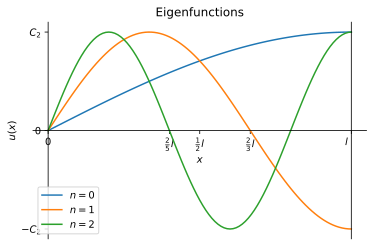

In [1]:
%config InlineBackend.figure_format = 'svg'

import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
from sympy import abc
from sympy import *
import copy

C2, pi, n, l, x = abc.symbols('C2, pi, n, l, x')

f = sin((2*n + 1)*pi/(2*l) * x)

ns = np.array([0, 1, 2])

fig, ax = plt.subplots()

for n_ in ns:
    f_ = f.subs({n: n_, l: 1, pi: np.pi})
    func = lambdify(x, f_)

    X = np.arange(0, 1.01, 0.01)
    Y = func(X)

    ax.plot(X, Y)
    plt.xticks([0, 2/5, 0.5, 2/3, 1],
            ('$0$', '$\\frac{2}{5}l$',
            '$\\frac{1}{2}l$', '$\\frac{2}{3}l$',
            '$l\\hspace{1}$')
            )
    plt.yticks([-1, 0, 1], ('$-C_2$', '$0$', '$C_2$'))

ax.set_title('Eigenfunctions')
ax.set_xlabel('$x$')
ax.set_ylabel('$u(x)$')
ax.legend(('$n = 0$', '$n = 1$', '$n = 2$'))
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['right'].set_position(('data', 1))

## Problem 2

Concider elastic waves in a nonuniform rod between $x = 0$ and $x = l$, as in the lecture nodes. The density of the rod varies with space as $\rho = \rho_{0} (1 - \epsilon \frac{x(l-x)}{l^{2}})$, where $\rho_0$ is constant and $\epsilon \ge 0$ is some number. The corresponding eigenvalue problem is:

$$
\phi'' + k_{0}^{2} \left( 1 - \epsilon \frac{x(l-x)}{l^{2}} \right) \phi = 0, \hspace{3mm} \phi(0) = \phi(l) = 0.
$$

Here $k_{0}^{2} = \rho_{0} \omega^{2} l^{2} / c_{0}^{2}$. After rescaling, $x$ with $l$, the equation can be written as 

$$
\phi'' + \lambda^{2}(1 - \epsilon x (1-x))\phi = 0, \hspace{3mm} \phi(0) = \phi(1) = 0,
$$

where $\lambda^{2} = k_{0}^{2}l^{2} = \omega^{2}l^{2}/c_{0}^{2}$.  

Next, the problem is to find the solution at various values of $\epsilon$.  

Note that if $\epsilon = 0$, then we have the analytical solution: $\lambda_{n} = n\pi$ and $\phi_{n} = \sin{(\pi n x)}, n \in \mathbb{N}$.

**(a)** Find the eigenvalues $\lambda^{2}$ numerically using the second derivative approximation

$$
\phi'' \approx (\phi_{i-1} - 2\phi_{i} + \phi_{i+1})/h^{2}
$$

with the grid points $x = x_{i} = ih, i=0, 1, 2, ..., n+1$ and the grid size $h = l/(n+1)$. Take $n$ sufficiently large so that the computed eigenvalues and eigenvectors are accurate. How do you choose that number?  

**(b)** Plot the eigenvectors that correspond to the lowest five eigenvalues at $\epsilon = 0.1$ and on a separate plot show the first ten numerically found eigenvalues $\lambda$. How do they compare with those at $\epsilon = 0$?  

**(c)** How do the eigenvalues and eigenfunctions change when $\epsilon$ increases? Plot $\lambda (\epsilon)$.

### Solution



#### (a)

At first, we need to come up with the matrix form.  

For this, let's plug the approximation into the equation and rearrange the members:

$$
\phi_{i-1} - 2\phi_{i} + \phi_{i+1} + \lambda^{2} h^{2}(1-\epsilon x(1-x))\phi_{i} = 0, \\
\hspace{3mm} \\
\phi_{i-1} - 2\phi_{i} + \phi_{i+1} = \lambda^{2} h^{2} \hat{\rho_{i}} \phi_{i} \\
\hspace{3mm} \\
A\phi = \lambda^{2} K\phi,
$$

where $\hat{\rho_{i}} = (\epsilon x_{i}(1-x_{i}) - 1)$.

To move $K$ to the left, we have to be sure that it is not singular. Since it is a diagonal matrix with elements $h^{2}\hat{\rho_{i}}$, all of it's elemets must be non-zero. Knowing $h^{2}$ is not zero, we get the condition of singularity:

$$
\epsilon x_{i}(1-x_{i}) - 1 = 0,
$$

or

$$
x^{2}_{i} - x_{i} + \frac{1}{\epsilon} = 0, \hspace{3mm} \epsilon \neq 0.
$$

Solving this quadratic equation for $x_{i}$, we get:

$$
x_{i_{1, 2}} = \frac{1}{2} \left( 1 \pm \sqrt{1 - \frac{4}{\epsilon}}\right).
$$

For $x_{i}$ to have real roots, $\epsilon$ must be $\geq 4$. As long as $\epsilon \leq 4$, the matrix $K$ is non-singular and can be moved to the left:

$$
K^{-1}A\phi = \lambda^{2} \phi.
$$

$K$ doesn't depend on $\phi$, thus we can precalculate it and then transfer the inverted matrix $K^{-1}$.

```{warning}
At first, I want to see the general solution with any $\epsilon$ and abstract $h$. By the powers of *SymPy* I will carry $\epsilon$ in the calculations. Due to the computation complexity of eigen**values** (let alone eigen**vectors**), the grid for this step will be chosen extremely sparse Actually, I was not able to get any solution for grids larger that 2 (!) points. Let it be 2 points then.

This is just for pure educational purposes, it serves no practical reason.
```

For matrix $K$, we can write it's diagonal element in terms of our grid as follows:

$$
K^{i}_{i} = h^{2}(\epsilon ih(1-ih)-1)
$$


In [2]:
x0, eps, h = symbols('x0, epsilon, h')

step = 0.5


def create_grid(step):
    X = np.arange(0, 1, step)
    m = len(X)
    return X, m

X, m = create_grid(step)


#computing the matrix K along the grid
def matrix_K(m):
    vec = [h**2*(eps*i*h*(1-(i*h))-1) for i in range(m)]
    K = sp.Matrix.diag(vec)
    return K

K = matrix_K(m)


#building the inverse matrix K^-1
K_inv = K.inv()


#Building the matrix A
def matrix_A(m):
    A = sp.Matrix.diag([-2 for i in range(m)])
    ud = sp.Matrix(np.eye(m, m, 1, dtype=int))
    ld = sp.Matrix(np.eye(m, m, -1, dtype=int))
    A = A + ud + ld
    return A

A = matrix_A(m)


#Building the final matrix B: B{phi} = lambda^2 {phi}
B = K_inv*A

Let's have a look at the matrix $B$:

In [3]:
B

Matrix([
[                                 2/h**2,                                -1/h**2],
[-1/(epsilon*h**4 - epsilon*h**3 + h**2), 2/(epsilon*h**4 - epsilon*h**3 + h**2)]])

Now we can find the eigenvalues with respect to $\epsilon$:

In [4]:
vals = B.eigenvals()
vals_list = list(vals.keys())
vals_vec = sp.Matrix(vals_list)
vals_vec.simplify()
vals_vec

Matrix([
[(epsilon*h**2 - epsilon*h - sqrt(epsilon**2*h**4 - 2*epsilon**2*h**3 + epsilon**2*h**2 + epsilon*h**2 - epsilon*h + 1) + 2)/(h**2*(epsilon*h**2 - epsilon*h + 1))],
[(epsilon*h**2 - epsilon*h + sqrt(epsilon**2*h**4 - 2*epsilon**2*h**3 + epsilon**2*h**2 + epsilon*h**2 - epsilon*h + 1) + 2)/(h**2*(epsilon*h**2 - epsilon*h + 1))]])

```{note}
At this point, there is no point (sorry) for solving the system symbolically. It just takes a large (and unknown) amount of time.
```

#### (b)

Now let us increase the grid density and substitute the $\epsilon$ and $h$ with real values. We'll take $\epsilon = 0.1$ to correspond with the next point of the problem. The grid density was taken large enough to be accurate, but low enough to not brick my laptop for hours.

```{note}
As for more meaningful reasoning for the grid density, we shall account for the approximation method of the second derivative. In this method, we assume that between the points $x_{i-1}$ and $x_{i}$, as well as $x_{i}$ and $x_{i+1}$ the function doesn't change too much. By too much we understand that between two points it could, for example, have a peak with it's derivative changing the sign. Concider, for example, a function $\cos{\omega x}$ with $\omega$ equal to the number of the points on the grid ($\omega = 1000$ for simplicity). There are 1000 points where $\sin(1000x)$ intersects the $X$ axis, with its value being $0$ and derivative being $\pm 1000\cos{(1000x)}$. If the points of the grid are distributed uniformly between $0$ and $pi$, they very well lay exatly on top of those points of the intersection. That means, when we start numerical calculation, where every next point depends on the previous, our solution will diverge from the real solution very quickly.
As a conclusion, the grid density should overcome the frequency of the largest-amplitude oscillations. The more frequent oscillations will be lost.
```

In [5]:
step = 0.005

X, m = create_grid(step)

K = matrix_K(m)

K_inv = K.inv()

A = matrix_A(m)

B = K_inv*A

#substitution dictionary:

sub = {h: step, eps: 0.1}

B_sub = B.subs(sub)
B_sub[0:3, 0:3]

Matrix([
[          80000.0,          -40000.0,                 0],
[-40019.9099051778,  80039.8198103556, -40019.9099051778],
[                0, -40039.6392428504,  80079.2784857008]])

In [6]:
import scipy as scp
from scipy import sparse
from scipy.sparse import linalg

B_sparse = np.matrix(B_sub)
B_sparse = B_sparse.astype(float)
vals, vecs = linalg.eigs(B_sparse, k=10, sigma=0)

sp.Matrix(vals)



Matrix([
[9.98816227171941],
[39.7938944175406],
[89.4633831983829],
[158.983843331693],
[ 248.33821812498],
[357.504660920439],
[486.456496708027],
[635.162220479623],
[803.585502722614],
[ 991.68519754949]])

Here are the 10 lowest eigenvalues $\lambda ^{2}$. Let's plot the eigenfunctions and eigenvectors on two separate plots and compare them with $\epsilon = 0$ case:

In [7]:
import warnings
warnings.filterwarnings('ignore')

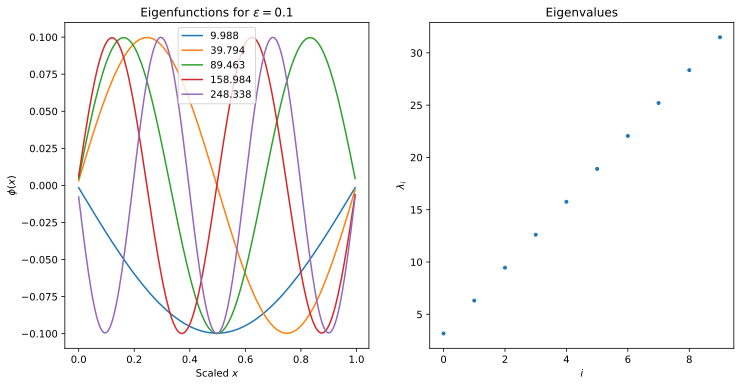

In [8]:
fig, (ax, ax2) = plt.subplots(1, 2)

for i in range(0, 5):
    ax.plot(X, np.array(vecs[:, i]))

ax.set_title('Eigenfunctions for $\epsilon = 0.1$')
ax.set_xlabel('Scaled $x$')
ax.set_ylabel('$\phi(x)$')
tmp = ax.legend([np.real(vals[i]).round(3) for i in range(5)])

ax2.plot(np.sqrt(np.array(vals)), lw=0, marker='.')
ax2.set_title('Eigenvalues')
ax2.set_xlabel('$i$')
ax2.set_ylabel('$\lambda_i$')
fig.set_size_inches(12, 6)


At this point with $\epsilon$ being a small number we see almost no difference with pure $\sin{}$ functions. Let us plug $\epsilon = 3$ and see what happens:

In [9]:
step = 0.005

X2, m2 = create_grid(step)

K2 = matrix_K(m2)

K2_inv = K.inv()

A2 = matrix_A(m2)

B2 = K_inv*A

#substitution dictionary:

sub2 = {h: step, eps: 3}

B2_sub = B2.subs(sub2)
##B2_sub[0:3, 0:3]

In [10]:
B2_sparse = np.matrix(B2_sub)
B2_sparse = B2_sparse.astype(float)
vals2, vecs2 = linalg.eigs(B2_sparse, k=10, sigma=0)

##sp.Matrix(vals2)

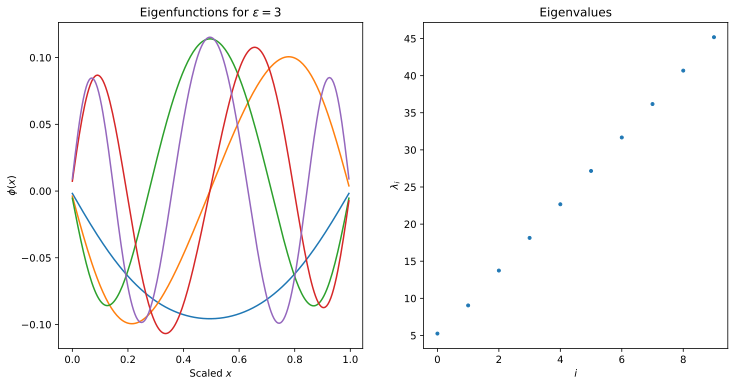

In [11]:
fig2, (ax3, ax4) = plt.subplots(1, 2)

for i in range(0, 5):
    ax3.plot(X, np.array(vecs2[:, i]))

ax3.set_title('Eigenfunctions for $\epsilon = 3$')
ax3.set_xlabel('Scaled $x$')
ax3.set_ylabel('$\phi(x)$')
tmp = ax.legend([np.real(vals2[i]).round(3) for i in range(5)])

ax4.plot(np.sqrt(np.array(vals2)), lw=0, marker='.')
ax4.set_title('Eigenvalues')
ax4.set_xlabel('$i$')
ax4.set_ylabel('$\lambda_i$')
fig2.set_size_inches(12, 6)

We can see a certain amount of envelope function presense, as well as phase shifting.

#### (c)

To do this task, we have to create a grid of $\epsilon$ values and solve for every $\epsilon$ in the grid. I will reduce the density of the grid to reduce the computation time.



In [12]:
step3 = 0.01

X3, m3 = create_grid(step3)

#print('Created Grid')

K3 = matrix_K(m3)

K3_inv = K3.inv()

#print('Calculated K3_inv')

A3 = matrix_A(m3)

#print('Calculated A3')

B3 = K3_inv*A3

#print('Calculated B3')

#substitution dictionaries:
max_eps = 4
eps_points = 10
epss = np.arange(0, 4, max_eps/eps_points)
substs = np.array([])

for i in range(0, eps_points):
    substs = np.append(substs, {h: step3, eps: epss[i]})

#print('Finished creating subs dictionaries')

B3s = [B3.subs(substs[i]) for i in range(0, eps_points)]

B3s_sparse = [np.matrix(b).astype(float) for b in B3s]

#print('Created numpy matrices')

Vals = np.ndarray((eps_points, 5))
Vecs = np.ndarray((10, m3, 5))

for i in range(0, eps_points):
    #print('Calculating {}th eigenvalues...'.format(i))
    va, ve = linalg.eigs(B3s_sparse[i], k=5, sigma=0)
    Vals[i] = va
    Vecs[i] = ve
    #print('Calculated {}th eigenvalues'.format(i))

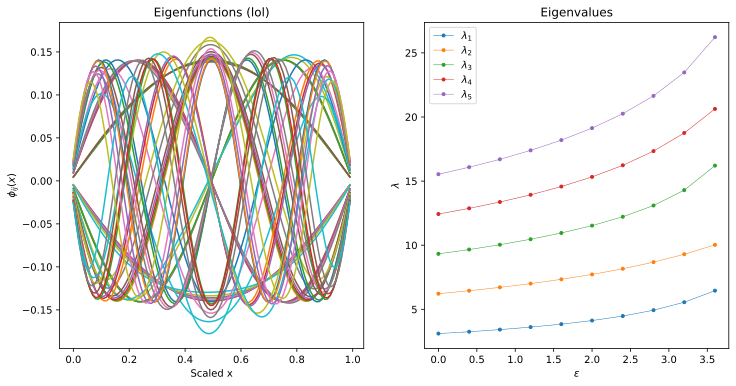

In [13]:
Vecss = [Vecs[i].transpose() for i in range(len(Vecs))]
Valss = Vals.transpose()

figg, (axx1, axx2) = plt.subplots(1, 2)

for i in range(5):
    axx2.plot(epss, np.sqrt(np.array(Valss[i])), lw=0.5, marker='.')
    for j in range(eps_points):
        axx1.plot(X3, Vecss[j][i])

axx1.set_title('Eigenfunctions (lol)')
axx1.set_xlabel('Scaled x')
axx1.set_ylabel('$\phi_{ij}(x)$')

axx2.set_title('Eigenvalues')
axx2.set_xlabel('$\epsilon$')
axx2.set_ylabel('$\lambda$')
legends = ['$\lambda_{{{}}}$'.format(i) for i in range(1, 6)]
tmp = axx2.legend(legends)

figg.set_size_inches(12, 6)

Jokes aside, we can follow the transformation of some eigenfunction related to a certain eigenvalue, for example, $\lambda_{5}$:

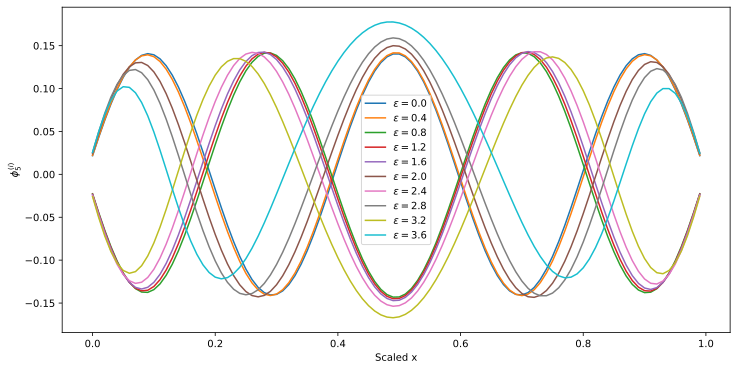

In [14]:
Vecsss = copy.deepcopy(Vecss)
for i in range(4, eps_points):
    Vecsss[i] = Vecss[i]*(-1)

for i in range(eps_points):
    plt.plot(X3, Vecsss[i][4])
plt.legend([1 for i in range(5)])

plt.xlabel('Scaled x')
plt.ylabel('$\phi_{5}^{(i)}$')

legends = ['$\epsilon = {}$'.format(epss[i].round(1)) for i in range(eps_points)]
tmp = plt.legend(legends)

plt.gcf().set_size_inches(12, 6)

With increasing $\epsilon$ we observe non-lenarity in the phase of the standing waves (eigenfunctions) and progressing "enveloping". Let's explore what happens, when we reach $\epsilon = 4$:

In [15]:
step4 = 0.005

X4, m4 = create_grid(step4)

K4 = matrix_K(m4)

K4_inv = K4.inv()

A4 = matrix_A(m4)

B4 = K4_inv*A4

#substitution dictionaries:
epss2 = np.array([3.8, 3.9, 4, 4.5, 8])
substs2 = np.array([])

for i in range(0, len(epss2)):
    substs2 = np.append(substs2, {h: step4, eps: epss2[i]})

B4s = [B4.subs(substs2[i]) for i in range(0, len(substs2))]

B4s_sparse = [np.matrix(b).astype(float) for b in B4s]

Vals2 = np.ndarray((len(epss2), 5))
Vecs2 = np.ndarray((10, m4, 5))

for i in range(0, len(epss2)):
    va2, ve2 = linalg.eigs(B4s_sparse[i], k=5, sigma=0)
    Vals2[i] = va2
    Vecs2[i] = ve2

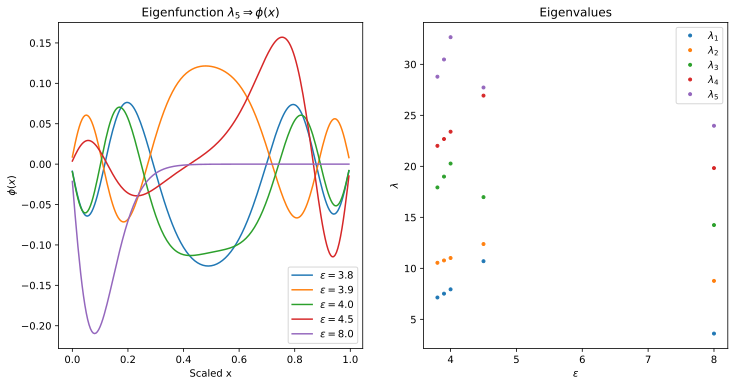

In [16]:
Vecss2 = [Vecs2[i].transpose() for i in range(len(Vecs2))]
Vecss2[-1] = Vecss2[-1]*-1
Vecss2[2] = Vecss2[2]*-1
Vecss2[3] = Vecss2[3]*-1
Valss2 = Vals2.transpose()

figg2, (axx12, axx22) = plt.subplots(1, 2)

for i in range(5):
    axx22.plot(epss2, np.sqrt(np.abs(np.array(Valss2[i]))), lw=0, marker='.')
    
for j in range(len(epss2)):
    axx12.plot(X4, Vecss2[j][4])

axx12.set_title('Eigenfunction $\lambda_5 \Rightarrow \phi(x)$')
axx12.set_xlabel('Scaled x')
axx12.set_ylabel('$\phi(x)$')

legends12 = ['$\epsilon = {}$'.format(epss2[i].round(1)) for i in range(len(epss2))]
tmp = axx12.legend(legends12)

axx22.set_title('Eigenvalues')
axx22.set_xlabel('$\epsilon$')
axx22.set_ylabel('$\lambda$')
legends2 = ['$\lambda_{{{}}}$'.format(i) for i in range(1, 6)]
tmp = axx22.legend(legends2)

figg2.set_size_inches(12, 6)


Well, it can be seen very clearly on the graph, but let's analyze.

Firstly, let's plug $\epsilon = 4$ into the roots equation for $\hat\rho = 0$ (also applicable to $\rho$):

$$
x_{1, 2} = \frac{1}{2} \left( 1 \pm \sqrt{1 - \frac{4}{4}}\right) = \frac{1}{2}
$$

As soon as $\epsilon$ reaches $4$, a non-imaginary solution for this equation appears in terms of $x$, meaning that at the point $x = \frac{1}{2}$ the eigenvalue problem will look like this:

$$
\phi'' + \lambda^2 \rho(x)\phi = \phi'' + 0 = 0,\\
\hspace{3mm}\\
\phi(x) = C_{1}x + C_{2}, \hspace{3mm} x=\frac{1}{2}.
$$

In the neighborhood of the point $x = \frac{1}{2}$ the solution $\phi(x)$ will be almost linear due to the negligibility of the term $\rho(x)$.

As long as $x$ crosses the root point, the term $\rho$ changes its sign, meaning that the problem transforms:

$$
\phi'' + C^2 \phi = 0, \hspace{3mm} \rho > 0, \\
\phi'' - C^2 \phi = 0, \hspace{3mm} \rho < 0,
$$

And the solution $\phi$ transfers from the harmonic form to the exponential form.

As long as $\epsilon$ continues to grow, we will observe two symmetrically diverging (from $x = \frac{1}{2}$) points, where $\rho(x) = 0$ and thus $\phi$ acts almost linearly (and performs the transition from one form to another).

## Problem 3

Let $A = \begin{bmatrix}5 & -3 \\ 0 & 4 \end{bmatrix}$.

**(a)** Find the SVD of A and illustrate on paper how $A = U\Sigma V^T$ transforms a vector $x$ into $Ax$ by a sequence of three transformations.

**(b)** Compare the result from **(a)** with how $A = S\Lambda S^-1$ transforms $x$ into $Ax$.


### Solution

The SVD decomposition is as follows:

```{figure} ../attachments/PS3/Problem_3_1.jpg
---
width: 400px
name: ps3p1p1
---
Page 1
```

```{figure} ../attachments/PS3/Problem_3_2.jpg
---
width: 400px
name: ps3p1p2
---
Page 2
```

```{figure} ../attachments/PS3/Problem_3_3.jpg
---
width: 400px
name: ps3p1p2
---
Page 3
```

```{figure} ../attachments/PS3/Problem_3_4.jpg
---
width: 400px
name: ps3p1p2
---
Page 4
```

To compare with spectral decomposition, we need to understand what each does.

SVD decomposes the complex linear transformation into a consequent set of rotations and stretch, while spectral decomposition firstly presents $x$ in the basis of $A's$ eigenvalues, stretches there by its eigenvalues, then returns the representation of $x$ to the initial basis:

$$
x = ah_1 + bh_2; \\
\hspace{3mm}\\
S^{-1}x = S^{-1}ah_1 + S^{-1}bh_2 = a\begin{bmatrix}1\\0\end{bmatrix} + b\begin{bmatrix}0\\1\end{bmatrix};\\
\hspace{3mm}\\
AS^{-1}x = a\begin{bmatrix}\lambda_1\\0\end{bmatrix} + b\begin{bmatrix}0\\\lambda_2\end{bmatrix};\\
\hspace{3mm}\\
SAS^{-1}x = a\begin{bmatrix}h_1 & h_2\end{bmatrix}\begin{bmatrix}\lambda_1 \\ 0\end{bmatrix} + \begin{bmatrix}h_1 & h_2\end{bmatrix}\begin{bmatrix}0 \\ \lambda_2\end{bmatrix} =\\
\hspace{3mm}\\
=a\lambda_1 h_1 + b\lambda_2 h_2.
$$

## Problem 4

Given column vectors $a$ and $b$, find the SVD of:

**(a)** $A = ab^T$,
**(b)** $B = ab^T + ba^T$ when $a^Tb = 0$.

### Solution

```{warning}
Much simplier solution at the end of this section
```

Let's analyze the expression $ab^T$. Firstly, it is an $m \times n$ matrix, with vector $a$ being $1 \times m$ and vector $b$ being $1 \times n$. Its rank is 1, which can be seen below:

$$
ab^T = \Big[ab_1, ab_2, ..., ab_n\Big],
$$

as it is a combination of columns of $a$ multiplied by $b_i$, thus, every column is linearly dependent. It follows that there will be only one non-zero eigenvalue and one corresponding eigenvector. Others can be chosen orthogonally to it.

Let's start the SVD procedure:

$$
A^TA = V\Sigma^T\Sigma V^T,\\
\hspace{3mm}\\
ba^Tab^T = V \Sigma^T \Sigma V^T.
$$

$a^Ta$ is a squared norm of vector $a$, i.e. a scalar. Moving it to the right:

$$
|a|^2bb^T = V \Sigma^T \Sigma V^T.
$$

Following the process, we concider matrix $\Sigma$ consisting of the square of eigenvalues of the matrix $A^T A$, and $V$ consisting of its corresponding eigenvectors. Finding the eigenvectors:

$$
|a|^2 bb^T h = \lambda h.
$$

But $b^T h$ is another scalar, name it $\kappa$. Then

$$
|a|^2 \kappa b = \lambda h,\\
\hspace{3mm}\\
h = |a|^2 \frac{\kappa}{\lambda}b.
$$

The eigenvector $h$ is collinear with vector $b$. Its eigenvalue $\lambda$ is the only non-zero eigenvalue, thus, matrix $\Sigma$ will be a zero matrix except the first diagonal element $\sigma^1_1 = \sqrt{\lambda}$. We want the vector $h$ normalized, thus, we divide it by its length:

$$
h := \frac{h}{|h|} = \frac{cb}{c|b|} = \frac{b}{|b|} = \begin{bmatrix}e_1 & ...&  e_n\end{bmatrix}^T, \hspace{3mm} \sum\limits_{i = 1}^{n}{e_i^2} = 1,
$$

where

$$
e_i = \frac{b_i}{|b|}.
$$

Then we may plug the vector $h$ into its definition and receive:

$$
\frac{b}{|b|} = |a|^2 \frac{b^T \frac{b}{|b|}}{\lambda}b,\\
\hspace{3mm}\\
b = \frac{|a|^2|b|^2}{\lambda}b,
$$

from here we derive $\lambda = |a|^2|b|^2$.

```{note}
For the sake of readability I will carry the symbol $\lambda$ as is.
```

So, our eigenvector $h$ is the unit vector in the direction of vector $b$.

```{warning}
This following step is completely irrelevant, but I decided not to remove it due to the amount of time i spent on it.
```

To complete the matrix $V$, we need to find $n-1$ more orthogonal vectors, which all will be eigenvectors with $\lambda_i = 0$. To do this, we can follow this logic. Let $c$ be our hypothetical eigenvector. It has to satisfy $h^Tc = 0$:

$$
h_1c_1 + h_2c_2 + ... + h_nc_n = 0.
$$

Suppose we have $k$ non-zero components of vector $h$. Then we straightforwardly have $n-k$ orthogonal eigenvectors $c_i$:

$$
c^{(i)} = \begin{bmatrix}0 & ... & 0 & 1 & 0 & ...\end{bmatrix}^T
$$

with $c^{(i)}_l = 1$ at such $l$ that $h_l = 0$. Another $k-1$ vectors $f^{(i)}$ orthogonal to $h$ and to each other can be acquired through Gramm-Schmidt orthogonalization process.

Consider a basis in the space of dimension $k$ complement to the space that is build on top of our vectors $c^{(i)}$. It can be build from vector $h$ and $k-1$ non-zero components of $h$ with each vector being only one component:

$$
\begin{equation}
r^{(i)}_j =
\begin{cases}
0, & i \neq j\\
h_j, & i = j
\end{cases}
\end{equation}
$$

The projection operator $proj_{r}f$ is defined as follows:

$$
proj_{r}f = \frac{f^Tr}{r^Tr}r.
$$

Then we get:

$$
\begin{align*}
f'^{(1)} = \frac{h}{|h|}, \hspace{3mm} f^{(1)} = \frac{f'^{(1)}}{|f'^{(1)}|}\\
\hspace{3mm}\\
f'^{(2)} = r^{(2)} - proj_{r^{(2)}}f^{(1)}, \hspace{3mm} f^{(2)} = \frac{f'^{(2)}}{|f'^{(2)}|}
\end{align*}\\
...
$$


```{note}
Actually we have $k+1$ linearly independend vectors: vector $h$ and $k$ vectors $r^{(i)}$, so we will stop at $i = k-1$. Acquiring vector $r^{(k)}$ will make the system linearly dependent, because vectors $r^{(i)}$ are in fact a decomposition of $h$ into projections on the basis vectors of the $k$ dimension space where all $h_i$ components are non-zero.
```

Finally we have a full system of orthonormal vectors $c^{(i)}$ and $f^{(j)}$, with $i = 1,...,n-k$ and $j = 1, ..., k-1$ and vector $h$.

Then our matrix $V$ will look like this:

$$
V =
\begin{bmatrix} h & c^{(1)} & ... & c^{(n-k)} & f^{(1)} & ... & f^{(k-1)}
\end{bmatrix},
$$

and matrix $\Sigma$:

$$
\Sigma =
\begin{bmatrix}
\sqrt{\lambda} & 0 & \cdots \\
0 & 0 & \cdots \\
\vdots & \vdots & \ddots
\end{bmatrix}
$$

Finishing the SV decomposition, we need to find the matrix $U$. For this, we write

$$
AV = U\Sigma,
$$

and thus

$$
U = AV\Sigma^{-1} = ab^T 
\begin{bmatrix} h & c^{(1)} & ... & c^{(n-k)} & f^{(1)} & ... & f^{(k-1)}
\end{bmatrix}
\begin{bmatrix}
\frac{1}{\sqrt{\lambda}} & 0 & \cdots \\
0 & 0 & \cdots \\
\vdots & \vdots & \ddots
\end{bmatrix}
 = \\
\hspace{3mm} \\
= ab^T 
\begin{bmatrix}
\frac{1}{\sqrt{\lambda}}h & 0 & \cdots
\end{bmatrix} = 
\frac{a}{|a||b|}
\begin{bmatrix}
|b| & 0 & \cdots
\end{bmatrix} = 
\begin{bmatrix}
\frac{a}{|a|} & 0 & \cdots
\end{bmatrix}
$$

We see that $U$ is a matrix with first column vector of all ones. It is easy to check that $U$ is orthogonal.

As we previously found, vector $h$ is a unit vector in the direction of $b$, thus $b^Th = |b|$.

Let's perform a check:

$$
A = U\Sigma V^T = 
\begin{bmatrix}
\vdots & \vdots & \cdots\\
1 & 0 & \cdots\\
\vdots & \vdots & \cdots
\end{bmatrix}
\begin{bmatrix}
\sqrt{\lambda} & 0 & \cdots \\
0 & 0 & \cdots \\
\vdots & \vdots & \ddots
\end{bmatrix}
\begin{bmatrix}
\cdots & h & \cdots\\
\cdots & c^{(1)} & \cdots\\
\vdots & \vdots & \vdots
\end{bmatrix} = 
\begin{bmatrix}
\vdots & \vdots & \cdots\\
a & 0 & \cdots\\
\vdots & \vdots & \cdots
\end{bmatrix}
\begin{bmatrix}
\cdots & b & \cdots\\
\cdots & 0 & \cdots\\
\vdots & \vdots & \vdots
\end{bmatrix} =
ab^T.
$$

```{warning}
Pheeew
```

```{note}
There is a simpler solution to this problem.

SVD is:

$$
A = U\Sigma V^T
$$

and

$$
ab^T = \frac{a}{|a|}|a||b|\frac{b^T}{|b|}.
$$

As soon as we write down the definition of singular value decomposition, we see that $u$ is a unit vector collinear to $a$ and $v$ is a unit vector collinear to $b$. Then plugging it back into the definition we receive:

$$
ab^T\alpha a = \sigma \alpha a;\\
b^Ta = \sigma \hspace{3mm} = |a||b|
$$

And the SVD is complete.
```

**(b)**

It is obvious that $rg(A)$ is $2$, since it is a sum of two rank-1 matrices with mutually linearly independent column vectors.

Let us utilize the definition of the SVD:

$$
A u = \sigma v\\
A^* v = \sigma u
$$

As we can easily see, $A^{*} = A^T = A$, thus

$$
Av = \sigma u,\\
Au = \sigma v
$$

and

$$
A^2v = \sigma^2 v,\\
A^2u = \sigma^2 u
$$

Let's find $A^2$:

$$
A^2 = (ab^t + ba^T)(ab^T + ba^T) =
ab^Tab^T + ab^Tba^T + ba^Tab^T + ba^Tba^T = \\
\hspace{3mm}\\
\big\{a^Tb = 0, \hspace{3mm} b^Ta = 0 \big\} =
ab^Tba^T + ba^Tab^T =
|b|^2aa^T + |a|^2bb^T
$$

We have the following result:

$$
|b|^2aa^Tv + |a|^2bb^Tv = \sigma^2 v;\\
|b|^2aa^Tu + |a|^2bb^Tu = \sigma^2 u
$$

We can see that $v$ and $u$ can be vectors collinear to $a$ and $b$ respectively:

$$
|b|^2aa^T\alpha a + |a|^2bb^T\alpha a = \sigma^2 \alpha a; \\
|b|^2|a|^2\alpha a = \sigma^2 \alpha a;\\
|b||a| = \sigma
$$

The same is true for $u$ and $b$.

We have one degenerate $\sigma$ and two corresponding singular vectors of unit length $v = \frac{a}{|a|}$ and $u = \frac{b}{|b|}$.

So, the matrix $U$ will consist of vectors $u$ and $v$ and the matrix $V$ will consist of the same vectors. Matrix $\Sigma$ will contain $\sigma_{1}^{1} = \sigma_{2}^{2} = |a||b|$ and other elements will be zero.

```{note}
A little clarification:

$$
ab^T + ba^T = u_1\sigma_1v_1^T + u_2\sigma_2v_2^T;\\
u_1 = a/\sigma_1, u_2 = b/\sigma_1, v_1^T = b^T/\sigma_2, v_2 = a^T/\sigma_2;\\
u_1 = v_2 = a/|a|, \\
u_2 = v_1 = b/|b|, \\
\sigma_1 = \sigma_2 = |a||b|
$$

Then

$$
\Sigma = 
\begin{bmatrix}
|a||b| & 0 & \cdots \\
0 & |a||b| & \cdots \\
\vdots & \vdots & \ddots
\end{bmatrix}, \\
\hspace{3mm}

U =
\begin{bmatrix}\frac{a}{|a|} & \frac{b}{|b|} & \cdots\end{bmatrix}, \\
\hspace{3mm}

V =
\begin{bmatrix}
\frac{b}{|b|} & \frac{a}{|a|} & \cdots\end{bmatrix}
$$
```


## Problem 5

For the matrix

$$
\begin{bmatrix}
0 & 1 & 1\\
1 & 0 & 1\\
0 & 1 & 1\\
1 & 0 & 1
\end{bmatrix},
$$

**(a)** using SVD, find the orthonormal basis for the column space, $C(A)$, and complete it with the basis for the left nullspace, $N(A^T)$, to form a basis for $\mathbb{R}^4$. Write down the $4 \times 4$ orthogonal matrix $U$.

**(b)** Also using SVD, find the orthonormal basis for the row space, $R(A)$, and complete it with the basis for the nullspace, $N(A)$, to form a basis for $\mathbb{R}^3$. Write down the $3 \times 3$ orthogonal matrix $V$.

**(c)** Write the full SVD $A = U\Sigma V^T$

**(d)** What is the best rank-1 approximation of $A$?

### Solution

This is a rank-2 matrix.

1. $A^TA = V\Sigma ^T \Sigma V^T$

$$
A^T A =
\begin{bmatrix}
2 & 0 & 2\\
0 & 2 & 2\\
2 & 2 & 4
\end{bmatrix}
$$

Eigenvalues:

$$
\lambda_1 = 6, \hspace{3mm} \lambda_2 = 2, \hspace{3mm} \lambda_3 = 0
$$

and singular values are:

$$
\sigma_1 = \sqrt{6}, \hspace{3mm} \sigma_2 = \sqrt{2}
$$

Normalized eigenvectors:

$$
v_1 = 
\begin{bmatrix}
  \sqrt{6}/6\\
  \sqrt{6}/6\\
  \sqrt{6}/3
\end{bmatrix}
, \hspace{3mm}
v_2 = 
\begin{bmatrix}
  -\sqrt{2}/2\\
  \sqrt{2}/2\\
  0
\end{bmatrix}
, \hspace{3mm}
v_3 = 
\begin{bmatrix}
  -\sqrt{3}/3\\
  -\sqrt{3}/3\\
  \sqrt{3}/3
\end{bmatrix}
$$

So, the orthonormal basis for the row space $R(A)$ is $\Big[v_1, v_2\Big]$, and the basis for the left null space $N(A^T)$ is $\Big[v_3\Big]$

2. Now let's find $U$: $AA^T = U\Sigma V^TV\Sigma^T U = U \Sigma \Sigma^T U^T$

Since $\Sigma^T = \Sigma$:

$$

AA^T =
\begin{bmatrix}
  2 & 1 & 2 & 1\\
  1 & 2 & 1 & 2\\
  2 & 1 & 2 & 1\\
  1 & 2 & 1 & 2\\
\end{bmatrix}
$$

Eigenvalues:

$$
\varphi_1 = 6, \hspace{3mm} \varphi_2 = 2, \hspace{3mm} \varphi_3 = \varphi_4 = 0
$$

and singular values are (obviously the same):

$$
\sigma_1 = \sqrt{6}, \hspace{3mm} \sigma_2 = \sqrt{2}
$$

Normalized eigenvectors:

$$
u_1 =
\begin{bmatrix}
  1/2\\
  1/2\\
  1/2\\
  1/2\\
\end{bmatrix}
, \hspace{3mm}
u_2 = 
\begin{bmatrix}
  -1/2\\
  1/2\\
  -1/2\\
  1/2\\
\end{bmatrix}
, \hspace{3mm} 
u_3 =
\begin{bmatrix}
  -\sqrt{2}/2\\
  0\\
  \sqrt{2}/2\\
  0\\
\end{bmatrix}
, \hspace{3mm}
u_4 = 
\begin{bmatrix}
  0\\
  -\sqrt{2}/2\\
  0\\
  \sqrt{2}/2\\
\end{bmatrix}
$$

Column space of $A$ is $\Big[u_1, u_2\Big]$

The basis for the nullspace $N(A)$ will be the remaining vectors, $\Big[u_3, u_4\Big]$.

Let's write down the full SVD (with respect to the order of descent of the $\sigma$):

$$
U = 
\begin{bmatrix}
1/2 & -1/2 & -\sqrt{2}/2 & 0  \\
1/2 & 1/2 & 0 & -\sqrt{2}/2 \\
1/2 & -1/2 & \sqrt{2}/2 & 0 \\
1/2 & 1/2 & 0  & \sqrt{2}/2 \\
\end{bmatrix}, \\
\hspace{3mm}\\
\Sigma =
\begin{bmatrix}
\sqrt{6} & 0 & 0 \\
0 & \sqrt{2} & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
\end{bmatrix},\\
\hspace{3mm}\\
V = 
\begin{bmatrix}
\sqrt{6}/6 & -\sqrt{2}/2 & -\sqrt{3}/3\\ 
\sqrt{6}/6 & \sqrt{2}/2 & -\sqrt{3}/3\\
\sqrt{6}/3 & 0 & \sqrt{3}/3
\end{bmatrix}
$$

Then the best rank-1 approximation of $A$ will be $u_1 \sigma_1 v_1^T$:

$$
A^{(1)} = 
\begin{bmatrix}
  1/2 & 1/2 & 1\\
  1/2 & 1/2 & 1\\
  1/2 & 1/2 & 1\\
  1/2 & 1/2 & 1\\
\end{bmatrix}.
$$
